In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
# import seaborn as sns
import librosa
import librosa.display
import IPython


import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from tqdm import tqdm


In [2]:
Crema_Path='../input/speech-emotion-recognition-en/Crema/'

In [3]:
!pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.0 MB/s eta 0:00:0000:01
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2


In [113]:
crema = []
for wav in sorted(os.listdir(Crema_Path)):
    emotion = wav.partition(".wav")[0].split('_')
    if emotion[2] == 'SAD':
        crema.append((emotion[0], 'sad', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    elif emotion[2] == 'ANG':
        crema.append((emotion[0], 'angry', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    elif emotion[2] == 'DIS':
        crema.append((emotion[0], 'disgust', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    elif emotion[2] == 'FEA':
        crema.append((emotion[0], 'fear', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    elif emotion[2] == 'HAP':
        crema.append((emotion[0], 'happy', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    elif emotion[2] == 'NEU':
        crema.append((emotion[0], 'neutral', Crema_Path+'/'+wav, emotion[1], emotion[3]))
    else:
        crema.append((emotion[0], 'unknown', Crema_Path+'/'+wav, emotion[1], emotion[3]))

df = pd.DataFrame.from_records(crema, columns=['Person', 'Emotion', 'File_Path', 'sentence','intensity'])
df.head()


Person  Emotion                                          File_Path sentence  \
0   1001    angry  ../input/speech-emotion-recognition-en/Crema//...      DFA   
1   1001  disgust  ../input/speech-emotion-recognition-en/Crema//...      DFA   
2   1001     fear  ../input/speech-emotion-recognition-en/Crema//...      DFA   
3   1001    happy  ../input/speech-emotion-recognition-en/Crema//...      DFA   
4   1001  neutral  ../input/speech-emotion-recognition-en/Crema//...      DFA   

  intensity  
0        XX  
1        XX  
2        XX  
3        XX  
4        XX

In [114]:
df.File_Path[0]

'../input/speech-emotion-recognition-en/Crema//1001_DFA_ANG_XX.wav'

In [115]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder 
encoder = LabelEncoder()
# Fit the encoder on the column and transform the values
df['Emotion_encoded'] = encoder.fit_transform(df['Emotion'])

# Get the mapping between original labels and encoded values
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


In [116]:
label_mapping

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5}

In [117]:
df.groupby('Emotion')['intensity'].count()


Emotion
angry      1271
disgust    1271
fear       1271
happy      1271
neutral    1087
sad        1271
Name: intensity, dtype: int64

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_trainAndVal, X_test, y_trainAndVal, y_test = train_test_split(df['File_Path'], df['Emotion_encoded'], test_size=0.3, stratify=df['Emotion_encoded'], random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_trainAndVal, y_trainAndVal, test_size=0.05, stratify=y_trainAndVal, random_state=42)

# Print the sizes of each split
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))



Train set size: 4948
Validation set size: 261
Test set size: 2233


In [10]:
X_train=X_train.reset_index().drop(columns=["index"])
y_train=y_train.reset_index().drop(columns=["index"])

X_test=X_test.reset_index().drop(columns=["index"])
y_test=y_test.reset_index().drop(columns=["index"])

X_val=X_val.reset_index().drop(columns=["index"])
y_val=y_val.reset_index().drop(columns=["index"])


In [11]:
df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

In [12]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [13]:
def wave_plot(data,sr,emotion):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr)

In [14]:
emotion_names=df['Emotion'].unique()

# Plotting and listening to a sample of each Emotion


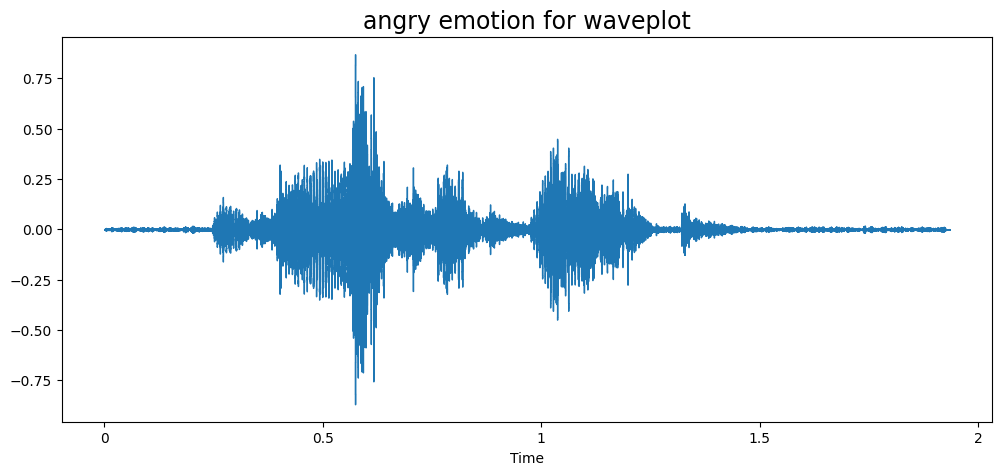

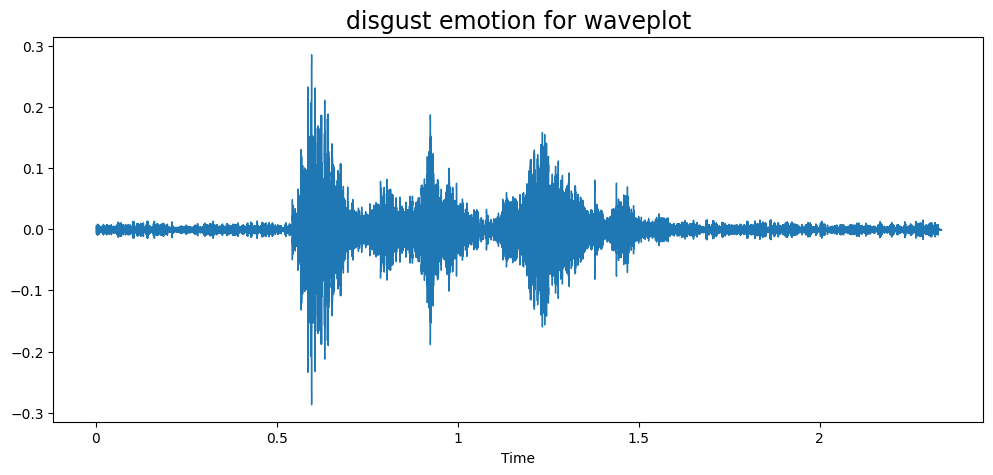

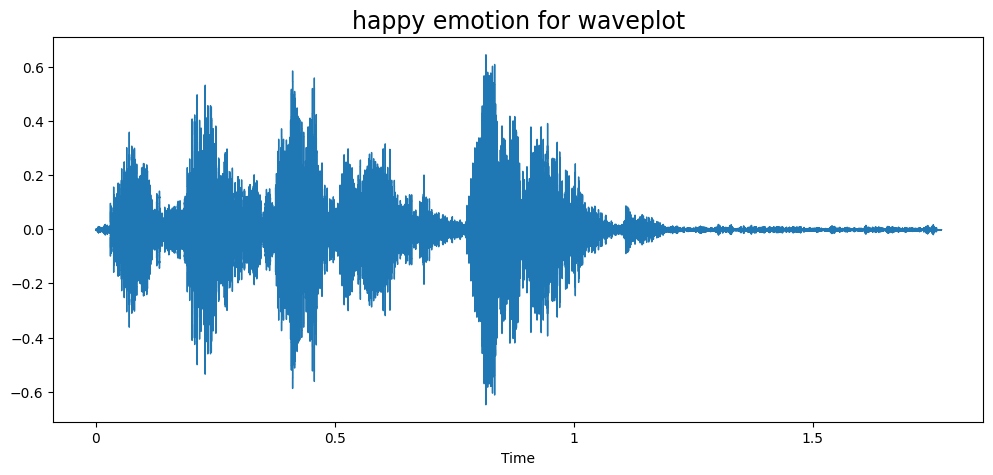

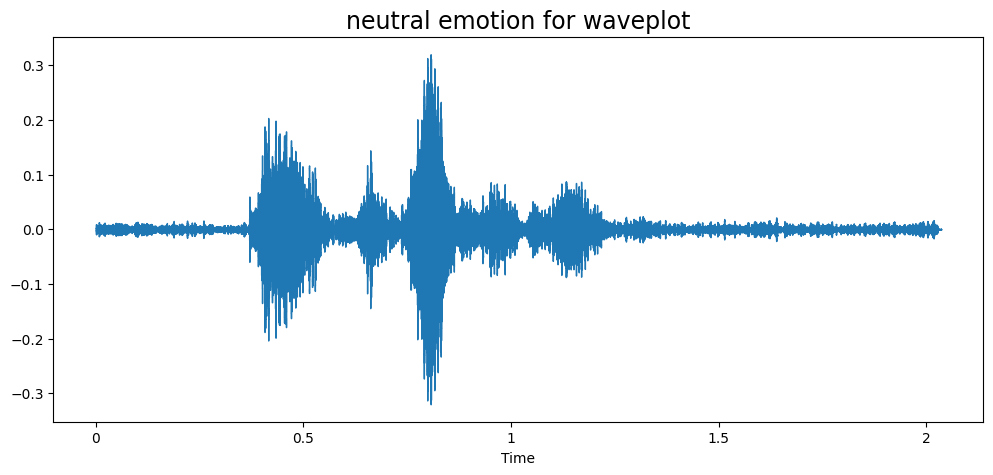

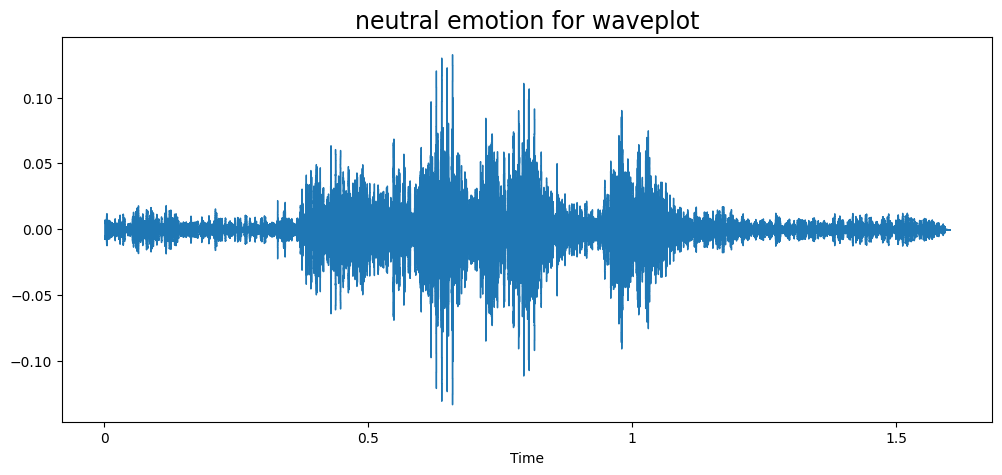

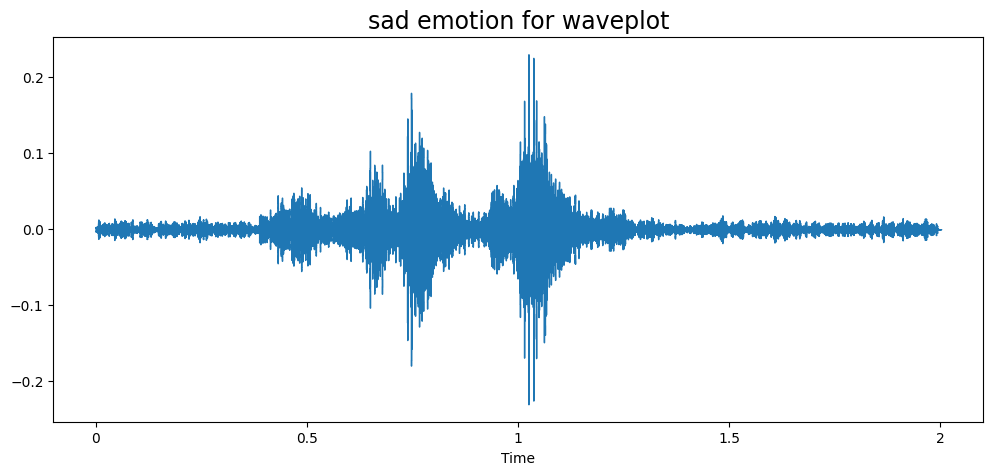

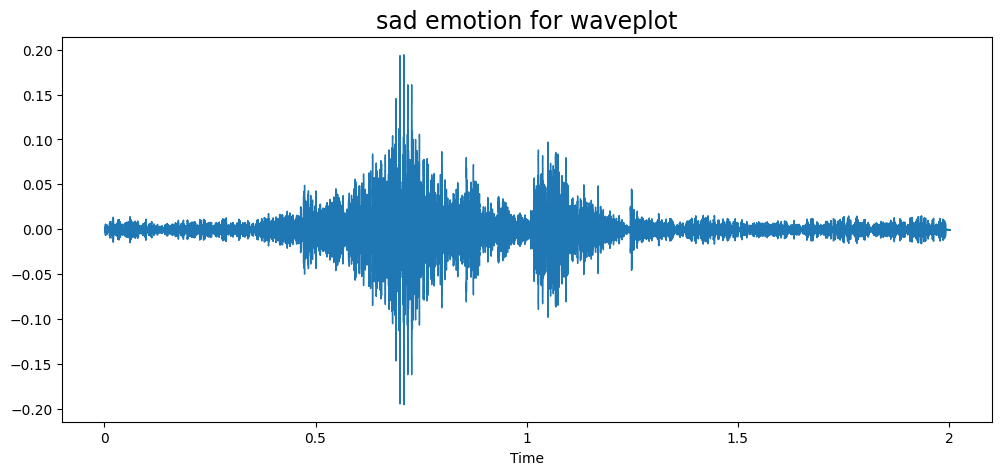

In [15]:
audio_path=[]
for emotion in emotion_names:
    paths=np.array(df['File_Path'][df['Emotion']==emotion])[:2]
    for path in paths:
        data,sr=librosa.load(path)
        wave_plot(data,sr,emotion)
        audio_path.append(path)

In [16]:
i = 0
for emotion in emotion_names:
    print(f'{emotion} Audio Sample\n')
    IPython.display.display(IPython.display.Audio(audio_path[i]))
    print(f'{emotion} Audio Sample\n')
    IPython.display.display(IPython.display.Audio(audio_path[i+1]))
    i+=2

angry Audio Sample



angry Audio Sample



disgust Audio Sample



disgust Audio Sample



fear Audio Sample



fear Audio Sample



happy Audio Sample



happy Audio Sample



neutral Audio Sample



neutral Audio Sample



sad Audio Sample



sad Audio Sample



# Data analysis

**Choosing parameters for melspectogram**

For distinguishing between different emotional states in voice recordings (such as angry, sad, and happy), a suitable value for `n_fft` can vary depending on the specific characteristics of the audio data and the analysis requirements. Here are some considerations to help you choose an appropriate `n_fft` value:

1. Emotional vocal characteristics: Different emotional states can manifest in various ways in the voice, including changes in pitch, intonation, spectral balance, and energy distribution. The relevant emotional cues may span a range of frequencies. It's important to select an `n_fft` value that captures the relevant frequency components related to emotional characteristics.

2. Spectral features: Emotional content in voice recordings can be reflected in the spectral content. Larger `n_fft` values allow for better frequency resolution, potentially capturing more subtle spectral details that differentiate emotional states. However, keep in mind that increasing `n_fft` also increases computational requirements.

3. Duration of emotional cues: Consider the duration of the emotional cues you expect to capture. If emotional information is expressed in short temporal segments, a smaller `n_fft` might be sufficient. On the other hand, if emotional cues extend over longer durations, a larger `n_fft` could be beneficial to capture more comprehensive spectral information.

4. Computational resources: Take into account the available computational resources for your analysis. Larger `n_fft` values require more processing power and memory. Ensure that your chosen `n_fft` value is computationally feasible given the constraints of your system.

While an exact value of `n_fft` cannot be determined without specific knowledge of your dataset, a value in the range of 1024 to 4096 is commonly used for speech-related analysis tasks. You can start with a default value like 2048 and adjust it based on the characteristics of your voice data and the results you obtain. It may be helpful to experiment with different `n_fft` values to find the optimal balance between capturing relevant spectral features and computational efficiency for your specific task of distinguishing between angry, sad, and happy voices.

**hop_length**

As for the specific value of hop_length, it's common to set it to a fraction of n_fft to achieve a good balance between time and frequency resolution. A typical choice is to set hop_length to half (hop_length = n_fft // 2) or a quarter (hop_length = n_fft // 4) of the n_fft value. In this case, a hop_length value of 1024 (hop_length = 2048 // 2) can be a reasonable starting point.

**n_mels**

A common practice is to set n_mels to a value between 40 and 128. The choice within this range depends on the complexity of the audio data and the specific requirements of your emotion recognition task. It's generally recommended to start with a value around 64 and adjust it based on the characteristics of your data and the performance of your models.

In [20]:
def melspectogram_wave_plot(path,emotion):
    y,sr = librosa.load(path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=265, n_fft=2048 ,hop_length=512)

    S_dB = librosa.power_to_db(S)
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title=f'Mel-frequency spectrogram for {emotion} sound')

In [21]:
emotion_names

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

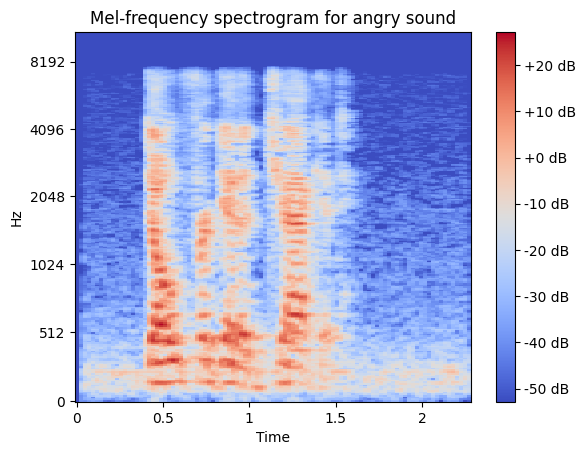

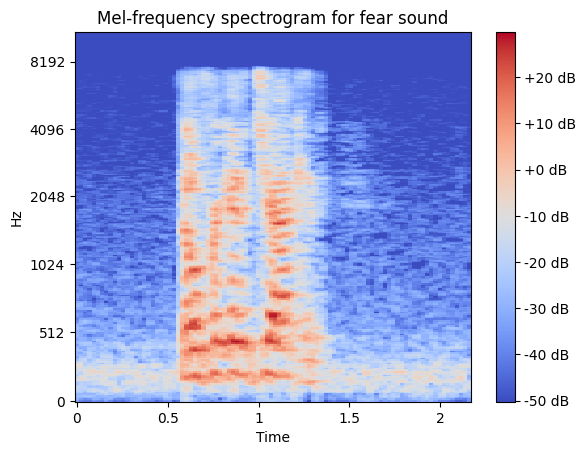

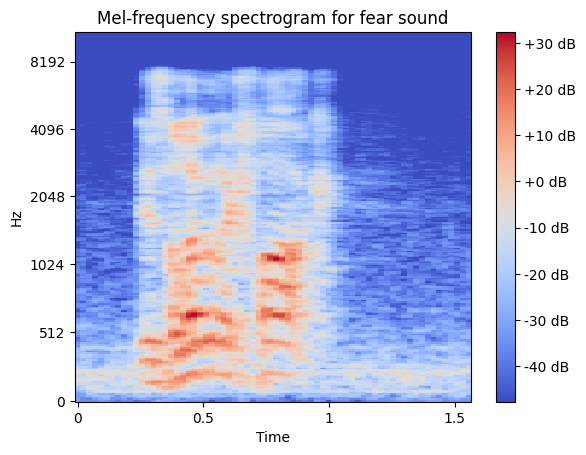

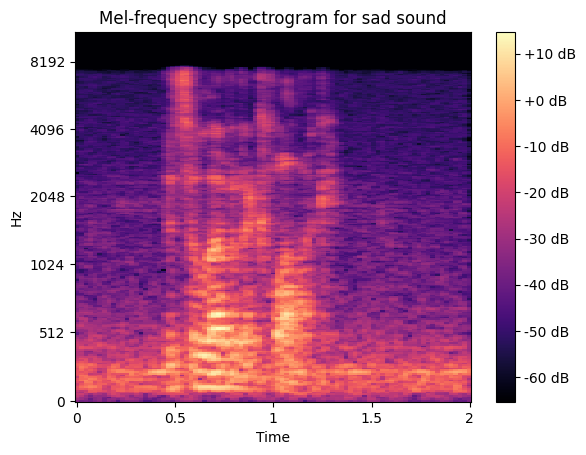

In [22]:
for idx in range(0, len(audio_path), 2):
    melspectogram_wave_plot(audio_path[idx],emotion_names[idx//2])
    melspectogram_wave_plot(audio_path[idx+1],emotion_names[idx//2])

In [23]:
guy1_df=df[df['Person']=="1001"]

guy1=np.array(guy1_df['File_Path'])

angry


disgust


fear


happy


neutral


sad


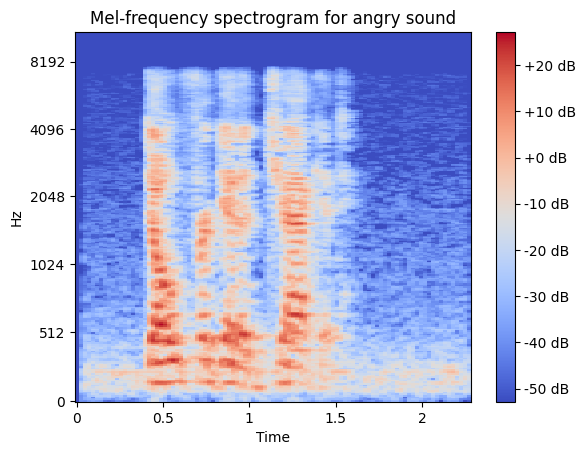

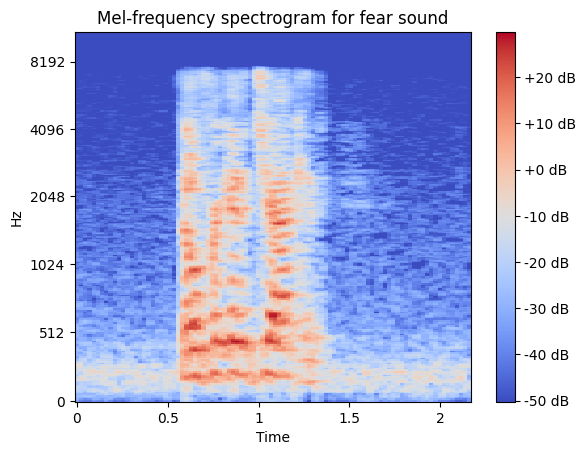

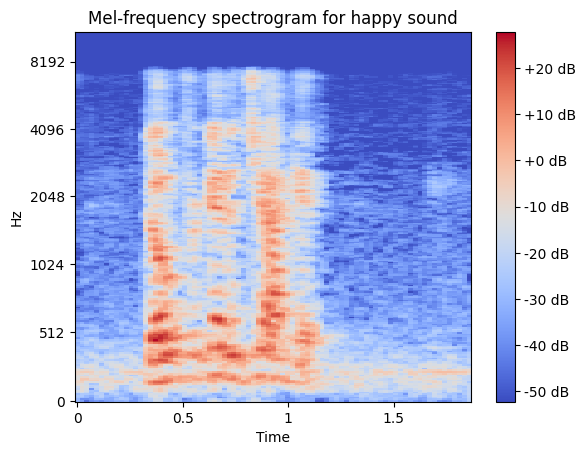

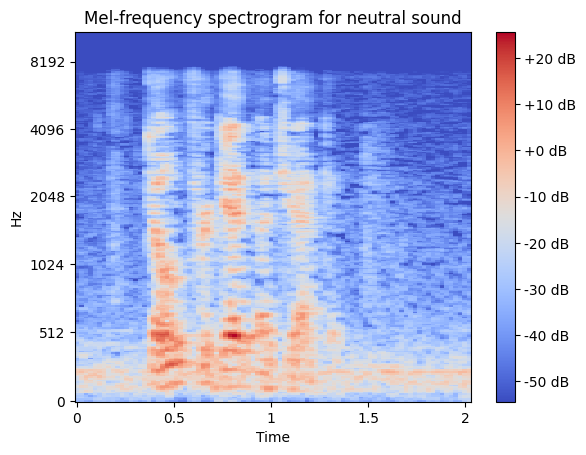

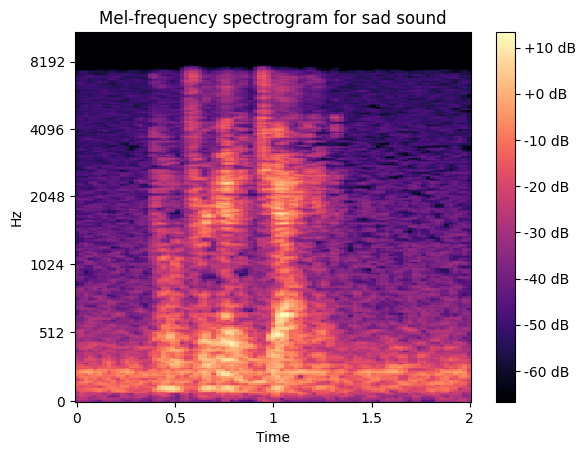

In [24]:
c=0
for idx,path in enumerate(guy1):
    emotion=guy1_df['Emotion'][idx]
    print(emotion)
    IPython.display.display(IPython.display.Audio(path))
    melspectogram_wave_plot(path,emotion)
    if c==5:
        break
    c+=1

angry


disgust


fear


happy


neutral


sad


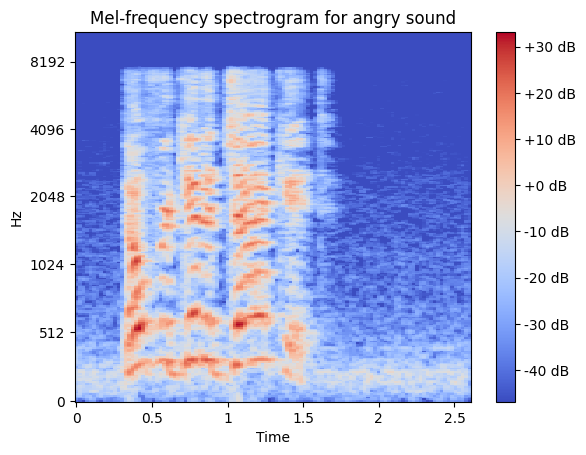

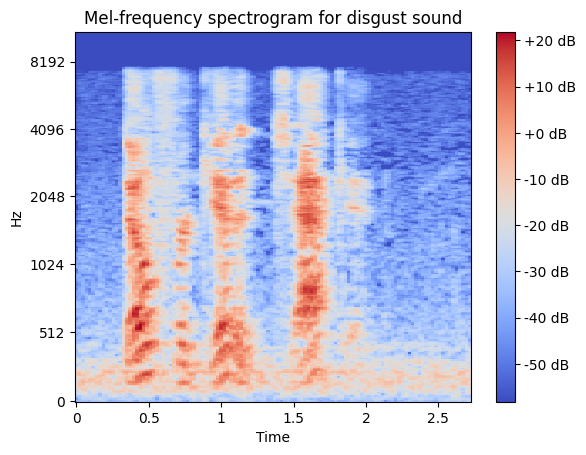

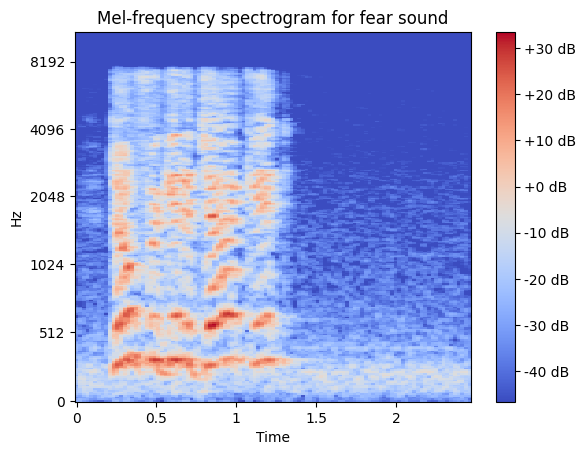

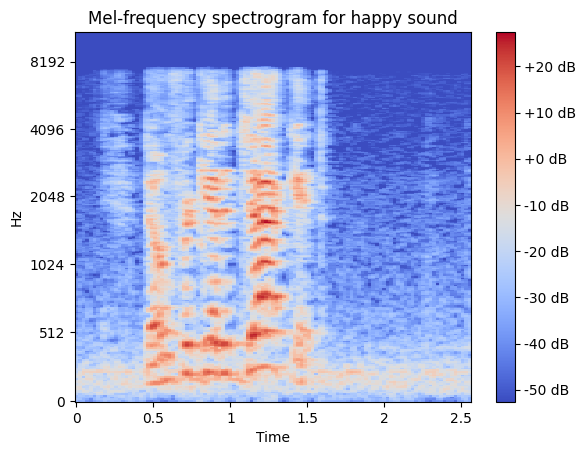

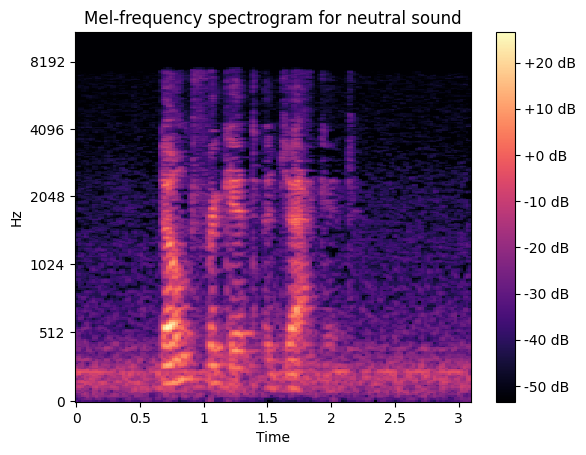

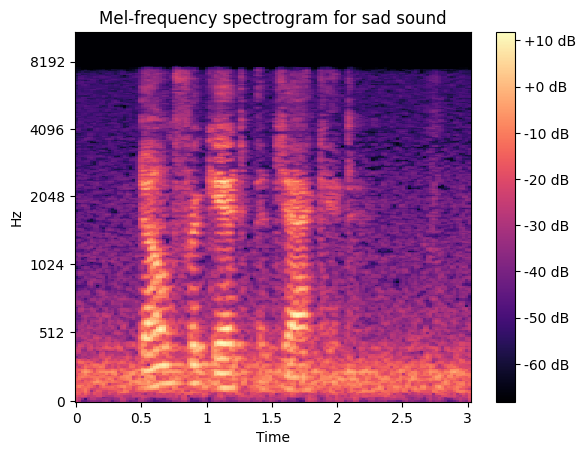

In [25]:
guy2_df=df[df['Person']=="1005"].reset_index()

guy2=np.array(guy2_df['File_Path'])
c=0
for idx,path in enumerate(guy2):
    emotion=guy2_df['Emotion'][idx]
    print(emotion)
    IPython.display.display(IPython.display.Audio(path))
    melspectogram_wave_plot(path,emotion)
    if c==5:
        break
    c+=1

In [47]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import torchaudio
augment = Compose([
    PitchShift(min_semitones=-2, max_semitones=4, p=1),
])

def augment_audio(y,sr):
    # Load audio file using librosa
    augmented_samples = augment(samples=y, sample_rate=sr)  
    
    audio_player = augmented_samples
    return augmented_samples

In [54]:
waveform, sample_rate = torchaudio.load('/kaggle/input/speech-emotion-recognition-en/Crema/1001_DFA_HAP_XX.wav')
IPython.display.Audio(waveform, rate=sample_rate)

In [55]:
agumented=augment_audio(np.array(waveform),sample_rate)
IPython.display.Audio(agumented, rate=sample_rate)


In [38]:
!pip install torchaudio

In [56]:
X_train.File_Path

0       ../input/speech-emotion-recognition-en/Crema//...
1       ../input/speech-emotion-recognition-en/Crema//...
2       ../input/speech-emotion-recognition-en/Crema//...
3       ../input/speech-emotion-recognition-en/Crema//...
4       ../input/speech-emotion-recognition-en/Crema//...
                              ...                        
4943    ../input/speech-emotion-recognition-en/Crema//...
4944    ../input/speech-emotion-recognition-en/Crema//...
4945    ../input/speech-emotion-recognition-en/Crema//...
4946    ../input/speech-emotion-recognition-en/Crema//...
4947    ../input/speech-emotion-recognition-en/Crema//...
Name: File_Path, Length: 4948, dtype: object

In [118]:
import torchaudio
import torchaudio.transforms as transforms

S_dB_Total = []
S_dB_noisy_total = []
Emotions_list_agumented = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for idx, path in tqdm(enumerate(df.File_Path)):
    waveform, sample_rate = torchaudio.load(path)
    
#     waveform_noisy = augment_audio(np.array(waveform), sample_rate)
    # Convert to tensor
    waveform = torch.tensor(waveform).to(device)
#     waveform_noisy = torch.tensor(waveform_noisy).to(device)
#     print(waveform.shape)

    # Convert to mel spectrogram
    mel_transform = transforms.MelSpectrogram(
        sample_rate=sample_rate,
        n_fft=2048,
        hop_length=512,
        n_mels=256
    ).to(device)
    
    S = mel_transform(waveform)
#     print(S.shape)
#     S_noisy = mel_transform(waveform_noisy)
#     print(S_noisy.shape)

    # Convert to dB
    power_to_db = transforms.AmplitudeToDB()
    S_dB = power_to_db(S)
#     S_dB_noisy = power_to_db(S_noisy)

    S_dB_Total.append(S_dB.squeeze())
#     S_dB_noisy_total.append(S_dB_noisy.squeeze())
#     Emotions_list_agumented.append(df.Emotion_encoded[idx])

0it [00:00, ?it/s]/tmp/ipykernel_32/2906989235.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  waveform = torch.tensor(waveform).to(device)
7442it [00:37, 198.25it/s]


In [119]:
sizes=[]
for x in S_dB_Total:
    sizes.append(x.shape[1])

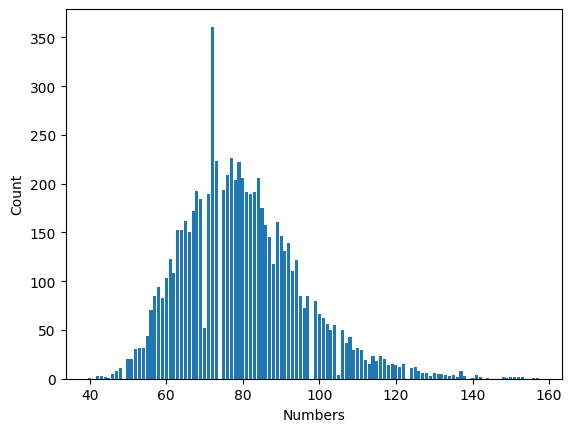

min is 40
max is 157


In [120]:
# Calculate the bin counts
bincount_array = np.histogram(sizes, bins=np.arange(min(sizes), max(sizes)+2))[0]

# Create a list of labels for the x-axis
x_labels = np.arange(min(sizes), max(sizes)+1)

# Plot the bin counts as a bar plot
plt.bar(x_labels, bincount_array)

# Set labels and title
plt.xlabel('Numbers')
plt.ylabel('Count')
plt.show()

print(f'min is {min(sizes)}')
print(f'max is {max(sizes)}')


In [121]:
padding_length = 160
padded_list = []
for array in S_dB_Total:
    current_shape = array.cpu().shape
    padding = [(0, 0), (0, padding_length - current_shape[1])]
    padded_array = np.pad(array.cpu(), padding, mode='constant', constant_values=0)
    padded_list.append(padded_array)

# Convert the padded list to a NumPy array
data_2D = np.array(padded_list)
    

In [122]:
data_2D.shape

(7442, 256, 160)

In [62]:
padding_length = 160
padded_list = []
for array in S_dB_noisy_total:
    current_shape = array.cpu().shape
    padding = [(0, 0), (0, padding_length - current_shape[1])]
    padded_array = np.pad(array.cpu(), padding, mode='constant', constant_values=0)
    padded_list.append(padded_array)

# Convert the padded list to a NumPy array
data_2D_Noisy = np.array(padded_list)
    

In [63]:
data_2D_Noisy.shape

(4948, 256, 160)

In [64]:
data_2D[4]

array([[ -9.001375  , -14.294648  ,  -3.3760169 , ...,   0.        ,
          0.        ,   0.        ],
       [ -1.5638187 ,  -2.4112842 ,  -1.6922593 , ...,   0.        ,
          0.        ,   0.        ],
       [  0.75759196,   1.3013278 ,  -4.5882645 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-31.52718   , -27.464947  , -26.311586  , ...,   0.        ,
          0.        ,   0.        ],
       [-30.580696  , -28.199017  , -28.04057   , ...,   0.        ,
          0.        ,   0.        ],
       [-32.30719   , -28.613756  , -27.595835  , ...,   0.        ,
          0.        ,   0.        ]], dtype=float32)

In [295]:
data_2D_Noisy[4]

array([[-2.3725185, -9.860724 , -3.1219018, ...,  0.       ,  0.       ,
         0.       ],
       [ 2.1530275, -2.0468624, -2.412198 , ...,  0.       ,  0.       ,
         0.       ],
       [ 3.150586 ,  2.0667908, -4.166546 , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 3.4184656,  2.1860058,  4.051451 , ...,  0.       ,  0.       ,
         0.       ],
       [ 5.263732 ,  4.807744 ,  3.9132211, ...,  0.       ,  0.       ,
         0.       ],
       [ 4.6326857,  4.7873716,  3.606455 , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [123]:
#normalization
from sklearn.preprocessing import MinMaxScaler

# Reshape the array to 2D
reshaped_data = data_2D.reshape((-1, 1))

# Initialize the MinMaxScaler
scaler1 = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler1.fit_transform(reshaped_data)

# Reshape the normalized data back to the original shape
normalized_data = normalized_data.reshape(data_2D.shape)


In [66]:
# Reshape the array to 2D
reshaped_data = data_2D_Noisy.reshape((-1, 1))

# Initialize the MinMaxScaler
scaler2 = MinMaxScaler()

# Fit and transform the data
normalized_data_Noisy = scaler2.fit_transform(reshaped_data)

# Reshape the normalized data back to the original shape
normalized_data_Noisy = normalized_data_Noisy.reshape(data_2D_Noisy.shape)


In [67]:
normalized_data[1]

array([[0.42390364, 0.55871177, 0.5664766 , ..., 0.64797693, 0.64797693,
        0.64797693],
       [0.4249806 , 0.5635497 , 0.5984893 , ..., 0.64797693, 0.64797693,
        0.64797693],
       [0.46087503, 0.5800565 , 0.59416807, ..., 0.64797693, 0.64797693,
        0.64797693],
       ...,
       [0.45911226, 0.44815361, 0.4471573 , ..., 0.64797693, 0.64797693,
        0.64797693],
       [0.44401705, 0.44050652, 0.45542192, ..., 0.64797693, 0.64797693,
        0.64797693],
       [0.4696087 , 0.47492257, 0.4633419 , ..., 0.64797693, 0.64797693,
        0.64797693]], dtype=float32)

In [68]:
normalized_data_Noisy[1]

array([[0.43146038, 0.56825036, 0.5763348 , ..., 0.6590885 , 0.6590885 ,
        0.6590885 ],
       [0.4329087 , 0.57315105, 0.60877895, ..., 0.6590885 , 0.6590885 ,
        0.6590885 ],
       [0.47056472, 0.5900666 , 0.60433394, ..., 0.6590885 , 0.6590885 ,
        0.6590885 ],
       ...,
       [0.29864794, 0.26260135, 0.20705056, ..., 0.6590885 , 0.6590885 ,
        0.6590885 ],
       [0.28718668, 0.24761239, 0.1059947 , ..., 0.6590885 , 0.6590885 ,
        0.6590885 ],
       [0.283077  , 0.24338832, 0.01713955, ..., 0.6590885 , 0.6590885 ,
        0.6590885 ]], dtype=float32)

In [124]:
data=np.expand_dims(normalized_data, axis=1)

In [125]:
labels=df.Emotion_encoded.to_numpy()

In [71]:
labels.shape

(7442,)

In [72]:
data.shape

(44145,)

In [126]:
#train test split
from sklearn.model_selection import train_test_split
# Perform the train-test split (70% train, 30% test & validation)
X_trainAndVal, X_test, y_trainAndVal, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

# Perform the train-validation split (50% test, 50% validation) (15%)
X_train, X_val, y_train, y_val = train_test_split(X_trainAndVal, y_trainAndVal, test_size=0.05, stratify=y_trainAndVal, random_state=42)

# Print the sizes of each split
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))



Train set size: 4948
Validation set size: 261
Test set size: 2233


In [74]:
y_train=y_train.to_numpy()

In [75]:
X_train.shape

(4948, 1, 256, 160)

In [76]:
noisy_data=np.expand_dims(normalized_data_Noisy, axis=1)

In [77]:
noisy_data.shape

(4948, 1, 256, 160)

In [78]:
labels_noisy=np.array(Emotions_list_agumented)

In [79]:
labels_noisy.shape

(4948,)

In [80]:
X_train.shape

(4948, 1, 256, 160)

In [81]:
len(X_train)

4948

In [82]:
portion=int(0.2*len(X_train))
noisy_portion=noisy_data[:portion]
noisy_portion_labels=labels_noisy[:portion]

In [83]:
noisy_portion.shape

(989, 1, 256, 160)

In [84]:
noisy_portion_labels.shape

(989,)

In [85]:
X_train.shape

(4948, 1, 256, 160)

In [86]:
noisy_portion.shape

(989, 1, 256, 160)

In [87]:
#add augmented audios
X_train_new=np.vstack((X_train, noisy_portion))


In [88]:
X_train_new.shape

(5937, 1, 256, 160)

In [89]:
y_train.shape

(4948, 1)

In [90]:
noisy_portion_labels.shape

(989,)

In [91]:
y_train_new=np.concatenate((y_train.squeeze(), noisy_portion_labels))


In [92]:
y_train_new.shape

(5937,)

In [93]:
# Shuffle the indices
np.random.seed(42)
shuffled_indices = np.random.permutation(len(X_train_new))

# Use the shuffled indices to shuffle both arrays
X_train_new = X_train_new[shuffled_indices]
y_train_new = y_train_new[shuffled_indices]

In [94]:
S_dB_Total = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for idx, path in tqdm(enumerate(X_test.File_Path)):
    waveform, sample_rate = torchaudio.load(path)
    

    # Convert to tensor
    waveform = torch.tensor(waveform).to(device)


    # Convert to mel spectrogram
    mel_transform = transforms.MelSpectrogram(
        sample_rate=sample_rate,
        n_fft=2048,
        hop_length=512,
        n_mels=256
    ).to(device)
    
    S = mel_transform(waveform)

    # Convert to dB
    power_to_db = transforms.AmplitudeToDB()
    S_dB = power_to_db(S)

    S_dB_Total.append(S_dB.squeeze())

0it [00:00, ?it/s]/tmp/ipykernel_32/362439431.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  waveform = torch.tensor(waveform).to(device)
2233it [00:27, 81.41it/s]


In [95]:
padding_length = 160
padded_list = []
for array in S_dB_Total:
    current_shape = array.cpu().shape
    padding = [(0, 0), (0, padding_length - current_shape[1])]
    padded_array = np.pad(array.cpu(), padding, mode='constant', constant_values=0)
    padded_list.append(padded_array)

# Convert the padded list to a NumPy array
test_2D = np.array(padded_list)

In [96]:
# Reshape the array to 2D
reshaped_data = test_2D.reshape((-1, 1))

# Initialize the MinMaxScaler
scaler1 = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler1.fit_transform(reshaped_data)

# Reshape the normalized data back to the original shape
normalized_data = normalized_data.reshape(test_2D.shape)

In [97]:
X_test=np.expand_dims(normalized_data, axis=1)
y_test=y_test.to_numpy().squeeze()

In [98]:
S_dB_Total = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for idx, path in tqdm(enumerate(X_val.File_Path)):
    waveform, sample_rate = torchaudio.load(path)
    

    # Convert to tensor
    waveform = torch.tensor(waveform).to(device)


    # Convert to mel spectrogram
    mel_transform = transforms.MelSpectrogram(
        sample_rate=sample_rate,
        n_fft=2048,
        hop_length=512,
        n_mels=256
    ).to(device)
    
    S = mel_transform(waveform)

    # Convert to dB
    power_to_db = transforms.AmplitudeToDB()
    S_dB = power_to_db(S)

    S_dB_Total.append(S_dB.squeeze())


0it [00:00, ?it/s]/tmp/ipykernel_32/2271667189.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  waveform = torch.tensor(waveform).to(device)
261it [00:03, 82.96it/s]


In [99]:
padding_length = 160
padded_list = []
for array in S_dB_Total:
    current_shape = array.cpu().shape
    padding = [(0, 0), (0, padding_length - current_shape[1])]
    padded_array = np.pad(array.cpu(), padding, mode='constant', constant_values=0)
    padded_list.append(padded_array)

# Convert the padded list to a NumPy array
val_2D = np.array(padded_list)


In [100]:
# Reshape the array to 2D
reshaped_data = val_2D.reshape((-1, 1))

# Initialize the MinMaxScaler
scaler1 = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler1.fit_transform(reshaped_data)

# Reshape the normalized data back to the original shape
normalized_data = normalized_data.reshape(val_2D.shape)


In [101]:
X_val=np.expand_dims(normalized_data, axis=1)
y_val=y_val.to_numpy().squeeze()

In [102]:
from torch.utils.data import Dataset, DataLoader

class AudioDataset(Dataset):
    def __init__(self,audio,label):
        self.audios=audio
        self.labels=label

    def __len__(self):
        return len(self.audios)

    def get_batch_imgs(self, idx):
        # Fetch a batch of inputs
        return self.audios[idx]
    
    def get_batch_labels(self, idx):
    # Fetch a batch of inputs
        return self.labels[idx]

    
    def __getitem__(self, index):
        audios=self.get_batch_imgs(index)
        labels=self.get_batch_labels(index)
        return audios,labels


In [103]:
X_train.shape

(4948, 1, 256, 160)

In [127]:
train_dataset = AudioDataset(X_train,y_train)
val_dataset = AudioDataset(X_val, y_val)
test_dataset = AudioDataset(X_test, y_test)

# Create a DataLoader from the dataset

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader=DataLoader(val_dataset, batch_size=32, shuffle=True)
test_dataloader=DataLoader(test_dataset, batch_size=32, shuffle=False)


# Architecture

In [128]:
#change nn.sequential to take dict to make more readable 

class ParaNet(nn.Module):
    # Define all layers present in the network
    def __init__(self,num_emotions):
        super().__init__() 

        self.dropout=nn.Dropout(p=0.3)
        self.relu=nn.ReLU()
        ############### 1ST PARALLEL 2D CONVOLUTION BLOCK ############
        # 3 sequential conv2D layers: (1,128,160) --> (16,64,80) -> (32,16,20) -> (64,4,5)
        self.conv2Dblock1 = nn.Sequential(
            
            # 1st 2D convolution layer
            nn.Conv2d(
                in_channels=1, # input volume depth == input channel dim == 1
                out_channels=16, # expand output feature map volume's depth to 16
                kernel_size=3, # typical 3*3 stride 1 kernel
                stride=1,
                padding=1
                      ),  #(1,128,160) - > (16,128,160)
            nn.BatchNorm2d(16), # batch normalize the output feature map before activation
            nn.ReLU(), # feature map --> activation map
            nn.MaxPool2d(kernel_size=2, stride=2), #typical maxpool kernel size  #(16,128,160) - > (16,64,80)
            nn.Dropout(p=0.4), #randomly zero 30% of 1st layer's output feature map in training
            
            # 2nd 2D convolution layer identical to last except output dim, maxpool kernel
            nn.Conv2d(
                in_channels=16, 
                out_channels=32, # expand output feature map volume's depth to 32
                kernel_size=3,
                stride=1,
                padding=1
                      ),#(16,64,80) - > (32,64,80)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4), # increase maxpool kernel for subsequent filters #(32,64,80) - > (32,16,20)
            nn.Dropout(p=0.4), 
            
            # 3rd 2D convolution layer identical to last except output dim
            nn.Conv2d(
                in_channels=32,
                out_channels=64, # expand output feature map volume's depth to 64
                kernel_size=3,
                stride=1,
                padding=1
                      ),#(32,16,20) - > (64,16,20)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),#(64,16,20) - > (64,4,5)
            nn.Dropout(p=0.4),
        )
        ############### 2ND PARALLEL 2D CONVOLUTION BLOCK ############
        # 3 sequential conv2D layers: (1,128,160) --> (32,64,80) -> (64,16,20) -> (128,4,5)
        self.conv2Dblock2 = nn.Sequential(
            # 1st 2D convolution layer
            nn.Conv2d(
                in_channels=1, # input volume depth == input channel dim == 1
                out_channels=32, # expand output feature map volume's depth to 16
                kernel_size=3, # typical 3*3 stride 1 kernel
                stride=1,
                padding=1
                      ),#(1,128,160) - > (32,128,160)
            nn.BatchNorm2d(32), # batch normalize the output feature map before activation
            nn.ReLU(), # feature map --> activation map
            nn.MaxPool2d(kernel_size=2, stride=2), #typical maxpool kernel size (32,128,160) - > (32,64,80)
            nn.Dropout(p=0.3), #randomly zero 30% of 1st layer's output feature map in training
            
            # 2nd 2D convolution layer identical to last except output dim, maxpool kernel
            nn.Conv2d(
                in_channels=32, 
                out_channels=64, # expand output feature map volume's depth to 64
                kernel_size=5,
                stride=1,
                padding=2
                      ),#(32,64,55) - > (64,64,55)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4), # increase maxpool kernel for subsequent filters (64,64,55) - > (64,16,20)
            nn.Dropout(p=0.4), 
            
            # 3rd 2D convolution layer identical to last except output dim
            nn.Conv2d(
                in_channels=64,
                out_channels=128, # expand output feature map volume's depth to 64
                kernel_size=7,
                stride=1,
                padding=3
                      ),#(64,64,20) - > (128,15,13)
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),#(128,15,13) - > (128,4,5)
            nn.Dropout(p=0.4),
        )
        
        ################# FINAL LINEAR BLOCK ####################
        # Linear softmax layer to take final concatenated embedding tensor 
        #    from parallel 2D convolutional and transformer blocks, output 6 logits 
        # Each full convolution block outputs (64*4*3) embedding flattened to dim 576 1D array 
        
        
        # Full transformer block outputs 128*27 feature map, which we time-avg to dim 128 1D array
        # 576*2+128 == 1280 input features --> 6 output emotions 
        self.fc1_linear = nn.Linear(64*8*5 + 128*8*5,num_emotions) 
        
        ### Softmax layer for the 6 output logits from final FC linear layer 
        self.softmax_out = nn.Softmax(dim=1) # dim==1 is the freq embedding
        
    # define one complete parallel fwd pass of input feature tensor thru 2*conv+1*transformer blocks
    def forward(self,x):
        
        ############ 1st parallel Conv2D block: 4 Convolutional layers ############################
        # create final feature embedding from 1st convolutional layer 
        # input features pased through 4 sequential 2D convolutional layers
        conv2d_embedding1 = self.conv2Dblock1(x) # x == N/batch * channel * freq * time
        
        

        # flatten final 64*1*8 feature map from convolutional layers to length 512 1D array 
        # skip the 1st (N/batch) dimension when flattening
        conv2d_embedding1 = torch.flatten(conv2d_embedding1, start_dim=1) 

        ############ 2nd parallel Conv2D block: 4 Convolutional layers #############################
        # create final feature embedding from 2nd convolutional layer 
        # input features pased through 4 sequential 2D convolutional layers
        conv2d_embedding2 = self.conv2Dblock2(x) # x == N/batch * channel * freq * time


        # flatten final 64*1*8 feature map from convolutional layers to length 512 1D array 
        # skip the 1st (N/batch) dimension when flattening.
        conv2d_embedding2 = torch.flatten(conv2d_embedding2, start_dim=1) 

        
        complete_embedding = torch.cat([conv2d_embedding1, conv2d_embedding2], dim=1)
        
        
        

        
        ######### final FC linear layer, need logits for loss #########################
        output_logits = self.fc1_linear(complete_embedding)  
        
        output_softmax = self.softmax_out(output_logits)

        # need output logits to compute cross entropy loss, need softmax probabilities to predict class
        return output_logits, output_softmax                       


In [130]:
from torchinfo import summary
# need device to instantiate model
device = 'cuda'

# instantiate model for 8 emotions and move to GPU 
model = ParaNet(6).to(device)

# include input feature map dims in call to summary()
summary(model, input_size=(32, 1, 256, 160))


Layer (type:depth-idx)                   Output Shape              Param #
ParaNet                                  [32, 6]                   --
├─Sequential: 1-1                        [32, 64, 8, 5]            --
│    └─Conv2d: 2-1                       [32, 16, 256, 160]        160
│    └─BatchNorm2d: 2-2                  [32, 16, 256, 160]        32
│    └─ReLU: 2-3                         [32, 16, 256, 160]        --
│    └─MaxPool2d: 2-4                    [32, 16, 128, 80]         --
│    └─Dropout: 2-5                      [32, 16, 128, 80]         --
│    └─Conv2d: 2-6                       [32, 32, 128, 80]         4,640
│    └─BatchNorm2d: 2-7                  [32, 32, 128, 80]         64
│    └─ReLU: 2-8                         [32, 32, 128, 80]         --
│    └─MaxPool2d: 2-9                    [32, 32, 32, 20]          --
│    └─Dropout: 2-10                     [32, 32, 32, 20]          --
│    └─Conv2d: 2-11                      [32, 64, 32, 20]          18,496
│    └─

In [131]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

EPOCHS=500
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
loss_fn =nn.CrossEntropyLoss().to(DEVICE)

LEARNING_RATE=1e-4
model = ParaNet(6).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
# optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=LEARNING_RATE, momentum=0.8)
# scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

In [132]:
def train_epoch(model, data_loader, loss_fn, optimizer, device):
    model = model.train()

    losses = []
    correct_predictions = 0
    total_predictions = 0

    for train_input, train_label in tqdm(data_loader):
        train_label = train_label.to(device)
        train_input = train_input.to(device)

        optimizer.zero_grad()
        
        output_logits, output_softmax = model(train_input.float())
        predictions = torch.argmax(output_softmax,dim=1)
        total_predictions += train_label.size(0)
        
        correct_predictions += (predictions == train_label).sum().item()
        
        loss = loss_fn(output_logits, train_label)

        losses.append(loss.item())


        loss.backward()
        optimizer.step()

    accuracy = correct_predictions / total_predictions
    mean_loss = np.mean(losses)

    return mean_loss, accuracy


In [133]:
def eval_model(model, data_loader, loss_fn, device):
    model = model.eval()

    losses = []
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():            
        for val_input, val_label in data_loader:
            val_label = val_label.to(device)
            val_input = val_input.to(device)

            optimizer.zero_grad()

            output_logits, output_softmax = model(val_input.float())

            predictions = torch.argmax(output_softmax,dim=1)
            total_predictions += val_label.size(0)

            correct_predictions += (predictions == val_label).sum().item()

            loss = loss_fn(output_logits, val_label)

            losses.append(loss.item())
            
            



        accuracy = correct_predictions / total_predictions
        mean_loss = np.mean(losses)
        
    return mean_loss, accuracy

In [134]:
from collections import defaultdict
import math
history = defaultdict(list)
loss=math.inf

In [ ]:
for epoch in range(EPOCHS):


    train_loss,train_acc = train_epoch(model,train_dataloader,loss_fn, optimizer, DEVICE)
    
    val_loss,val_acc = eval_model(model,val_dataloader,loss_fn, DEVICE)
    
    
#     if epoch%5 == 0 :
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    print(f'Train loss {train_loss}')
    print(f'Train Accuracy {train_acc}')

    print(f'Val   loss {val_loss}')
    print(f'Val   Acc {val_acc}')

    print()
        
    if val_loss < loss:
        torch.save(model.state_dict(), 'best_model_state.bin')
        loss = val_loss

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)


100%|██████████| 155/155 [00:08<00:00, 18.15it/s]


Epoch 1/500
----------
Train loss 1.8172792457765148
Train Accuracy 0.29951495553759094
Val   loss 1.562337703175015
Val   Acc 0.38697318007662834



100%|██████████| 155/155 [00:08<00:00, 18.46it/s]


Epoch 2/500
----------
Train loss 1.6074939766237812
Train Accuracy 0.36358124494745353
Val   loss 1.5865604745017157
Val   Acc 0.3793103448275862



100%|██████████| 155/155 [00:08<00:00, 18.45it/s]



In [197]:
model.load_state_dict(torch.load('/kaggle/working/best_model_state.bin'))

<All keys matched successfully>

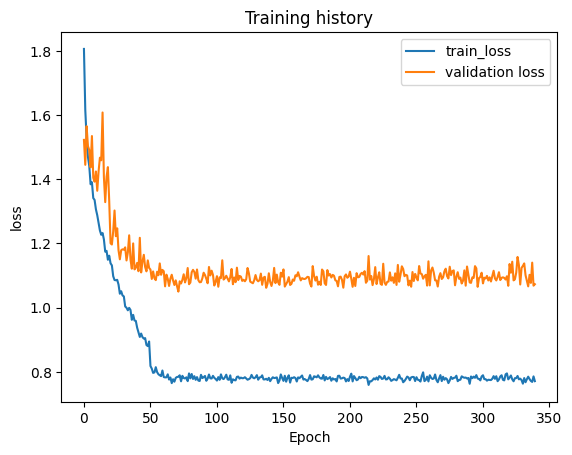

In [198]:
plt.plot(history['train_loss'], label='train_loss')
plt.plot(history['val_loss'], label='validation loss')

plt.title('Training history')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()


In [199]:
def get_predicted(model, data_loader, loss_fn, device):
    model = model.eval()

    losses = []
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():            
        for test_input, test_label in data_loader:
            test_label = test_label.to(device)
            test_input = test_input.to(device)

            optimizer.zero_grad()

            output_logits, output_softmax = model(test_input.float())

            predictions = torch.argmax(output_softmax,dim=1)
            total_predictions += test_label.size(0)

            correct_predictions += (predictions == test_label).sum().item()

            loss = loss_fn(output_logits, test_label)

            losses.append(loss.item())


        accuracy = correct_predictions / total_predictions
        mean_loss = np.mean(losses)

    return mean_loss, accuracy

In [200]:
loss,prediction=get_predicted(model,test_dataloader,loss_fn,DEVICE)

In [201]:
prediction

0.6224809673085535

In [202]:
loss

1.0259013772010803